In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
vehicle_id = 5
data_root = './'  # 改成自己电脑上的路径即可
dataset = pd.read_csv(data_root + 'perfect_%d.csv' % vehicle_id)
header = dataset.columns.values.tolist()
dataset.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy
count,172.0,1.720000e+02,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000
mean,5.0,2.017711e+13,2.017711e+13,2716.110465,93807.004651,138.541860,44.552326,92.116279,47.563953,557.552326,579.100000,-126.587209,-91.47093,38.755814,27.238372,60.479291
std,0.0,4.423509e+09,4.423505e+09,1704.842636,18672.648535,87.348396,16.058834,10.631982,20.967016,6.242183,10.429726,65.818805,88.61253,5.087391,5.620153,25.706147
min,5.0,2.017110e+13,2.017110e+13,240.000000,65877.400000,34.100000,20.000000,41.000000,4.000000,543.300000,561.000000,-200.000000,-199.00000,28.000000,13.000000,2.041000
25%,5.0,2.017121e+13,2.017121e+13,1572.500000,77089.175000,94.175000,31.000000,85.000000,35.000000,552.800000,572.775000,-189.000000,-189.25000,35.000000,23.750000,45.124750
50%,5.0,2.018020e+13,2.018020e+13,2240.000000,90870.650000,143.850000,42.000000,98.000000,46.500000,558.150000,575.050000,-151.000000,-39.50000,38.000000,27.000000,60.896000
75%,5.0,2.018050e+13,2.018050e+13,3635.000000,111906.300000,146.700000,54.000000,100.000000,68.000000,561.500000,587.325000,-69.500000,-5.00000,43.000000,31.000000,84.717750
max,5.0,2.018071e+13,2.018071e+13,6980.000000,128177.500000,869.000000,96.000000,100.000000,79.000000,585.100000,604.800000,-3.000000,-1.00000,50.000000,41.000000,100.792000


/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


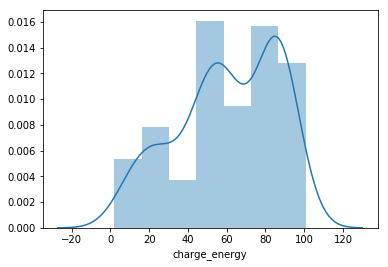

In [3]:
sns.distplot(dataset['charge_energy']);

### 特征选择

In [4]:
features = header[3:15]
label = header[15]
features, label

(['charge_duration',
  'mileage',
  'delta_mileage',
  'charge_start_soc',
  'charge_end_soc',
  'charge_delta_soc',
  'charge_start_U',
  'charge_end_U',
  'charge_start_I',
  'charge_end_I',
  'charge_max_temp',
  'charge_min_temp'],
 'charge_energy')

### 数据标准化

In [5]:
X = dataset[features]
y = dataset[label]

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X.astype(np.float64))

### 选择最优模型

In [6]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.svm import SVR


estimator_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(solver='lbfgs'),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    LinearSVR(),
    NuSVR(),
    SVR()
]

cv_split = ShuffleSplit(n_splits=6, train_size=0.7, test_size=0.2, random_state=168)
df_columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy Std', 'Comsumed Time']
df = pd.DataFrame(columns=df_columns)

row_index = 0
for estimator in estimator_list:
    df.loc[row_index, 'Name'] = estimator.__class__.__name__
    df.loc[row_index, 'Parameters'] = str(estimator.get_params())
    cv_results = cross_validate(estimator, X, y, cv=cv_split)
    df.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    df.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    df.loc[row_index, 'Test Accuracy Std'] = cv_results['test_score'].std()
    df.loc[row_index, 'Comsumed Time'] = cv_results['fit_time'].mean()
    print(row_index, estimator.__class__.__name__)
    print(cv_results['test_score'])
    row_index += 1
df = df.sort_values(by='Test Accuracy Mean', ascending=False)
df

0 LinearRegression
[ 0.99752752  0.99755561  0.99785295  0.99717869  0.99751172  0.99828108]
1 DecisionTreeRegressor
[ 0.99069834  0.99326129  0.98900094  0.98978493  0.99149051  0.99477346]
2 GradientBoostingRegressor
[ 0.99575298  0.99655602  0.9957683   0.99735368  0.99698762  0.997825  ]
3 MLPRegressor
[ 0.98807481  0.98974151  0.99464994  0.99266252  0.9934311   0.98799897]
4 AdaBoostRegressor
[ 0.98958817  0.99152972  0.9923923   0.99334945  0.9935081   0.9954263 ]
5 BaggingRegressor
[ 0.99151582  0.99584061  0.99413839  0.99413384  0.99467695  0.9959885 ]
6 ExtraTreesRegressor
[ 0.98644943  0.99603339  0.99428826  0.99454859  0.99253509  0.99744399]
7 RandomForestRegressor
[ 0.99399744  0.99581372  0.99380259  0.99568142  0.99454145  0.99466847]
8 LinearSVR
[ 0.9969624   0.9957189   0.99572161  0.99495179  0.99674375  0.99654608]
9 NuSVR
[ 0.443631    0.46669338  0.4070906   0.46784896  0.4462532   0.2012772 ]
10 SVR
[ 0.53117976  0.5908113   0.53252483  0.55772523  0.56492558  

,Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Test Accuracy Std,Comsumed Time
0,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.998179,0.997651,0.000342688,0.0033164
2,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",0.99991,0.996707,0.000770386,0.0371581
8,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.996413,0.996107,0.000702807,0.00202052
7,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.998711,0.994751,0.000765192,0.0338777
5,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",0.99875,0.994382,0.00147938,0.0200946
6,ExtraTreesRegressor,"{'bootstrap': False, 'criterion': 'mse', 'max_...",1,0.99355,0.00351949,0.0170584
4,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",0.996752,0.992632,0.00180867,0.10988
1,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",1,0.991502,0.00198525,0.00193779
3,MLPRegressor,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.99981,0.991093,0.00261696,0.159486
10,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.579826,0.515672,0.0911864,0.00178325


### 使用XGBoost

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.svm import SVR
from xgboost import XGBRegressor

estimator_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(solver='lbfgs'),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    LinearSVR(),
    NuSVR(),
    SVR(),
    XGBRegressor()
]

cv_split = ShuffleSplit(n_splits=6, train_size=0.7, test_size=0.2, random_state=168)
df_columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy Std', 'Comsumed Time']
df = pd.DataFrame(columns=df_columns)

row_index = 0
for estimator in estimator_list:
    df.loc[row_index, 'Name'] = estimator.__class__.__name__
    df.loc[row_index, 'Parameters'] = str(estimator.get_params())
    cv_results = cross_validate(estimator, X, y, cv=cv_split)
    df.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    df.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    df.loc[row_index, 'Test Accuracy Std'] = cv_results['test_score'].std()
    df.loc[row_index, 'Comsumed Time'] = cv_results['fit_time'].mean()
    print(row_index, estimator.__class__.__name__)
    print(cv_results['test_score'])
    row_index += 1
df = df.sort_values(by='Test Accuracy Mean', ascending=False)
df

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0 LinearRegression
[ 0.99752752  0.99755561  0.99785295  0.99717869  0.99751172  0.99828108]
1 DecisionTreeRegressor
[ 0.99383919  0.98847082  0.99081147  0.98761308  0.99118687  0.9955935 ]
2 GradientBoostingRegressor
[ 0.99593576  0.99663156  0.99594839  0.99757668  0.99717394  0.99790594]
3 MLPRegressor
[ 0.97852248  0.99545942  0.99376794  0.9884922   0.98998318  0.99182852]
4 AdaBoostRegressor
[ 0.9915399   0.99216186  0.99238105  0.99216657  0.99353969  0.9947745 ]
5 BaggingRegressor
[ 0.99451469  0.99578438  0.9905275   0.99436607  0.99423313  0.99407465]
6 ExtraTreesRegressor
[ 0.97270994  0.99645677  0.9951753   0.99654235  0.99548752  0.99868031]
7 RandomForestRegressor
[ 0.99361038  0.99618464  0.98766936  0.99471965  0.99308288  0.99571426]
8 LinearSVR
[ 0.99713021  0.99571116  0.99574023  0.99496596  0.99674008  0.99652747]
9 NuSVR
[ 0.443631    0.46669338  0.4070906   0.46784896  0.4462532   0.2012772 ]
10 SVR
[ 0.53117976  0.5908113   0.53252483  0.55772523  0.56492558  

,Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Test Accuracy Std,Comsumed Time
0,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.998179,0.997651,0.000342688,0.00170279
2,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",0.99991,0.996862,0.000757582,0.0360354
8,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.996422,0.996136,0.000731748,0.00289957
11,XGBRegressor,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.999827,0.995414,0.00266682,0.019161
5,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",0.998591,0.993917,0.00161552,0.0256745
7,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.998773,0.993497,0.00282195,0.0241016
4,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",0.996795,0.992761,0.00108076,0.124111
6,ExtraTreesRegressor,"{'bootstrap': False, 'criterion': 'mse', 'max_...",1,0.992509,0.00892488,0.0200124
1,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",1,0.991252,0.00279037,0.00156271
3,MLPRegressor,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.999757,0.989676,0.0054882,0.334281


### 搜索模型最优参数

In [8]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np 
import time

xgb_model = XGBRegressor(nthread = 2)
cv_split = ShuffleSplit(n_splits=6, train_size=0.7, test_size=0.2)
param_grid = dict(
    max_depth = [4, 5, 6, 7],
    learning_rate = np.linspace(0.03, 0.3, 10),
    n_estimators = [100, 200]
)
start = time.time()
grid = GridSearchCV(xgb_model, param_grid, cv=cv_split, scoring='neg_mean_squared_error')
grid.fit(X, y)
print('GridSearchCV process use %.2f seconds'%(time.time()-start))

GridSearchCV process use 23.03 seconds


In [9]:
print(grid.best_params_)
print(grid.best_score_)
print(len(grid._get_param_iterator()))

{'learning_rate': 0.059999999999999998, 'max_depth': 4, 'n_estimators': 200}
-2.87505138731
80
